<a href="https://colab.research.google.com/github/urvashii-b/Challenges2024/blob/master/SQLSyntheticAnswersT5SmallTrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [ ]:
# Initialize the tokenizer from Hugging Face Transformers library
tokenizer = T5Tokenizer.from_pretrained('t5-small')

# Load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = T5ForConditionalGeneration.from_pretrained('cssupport/t5-small-awesome-text-to-sql')
model = model.to(device)
model.eval()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [ ]:

def generate_sql(input_prompt):
    # Tokenize the input prompt
    inputs = tokenizer(input_prompt, padding=True, truncation=True, return_tensors="pt").to(device)

    # Forward pass
    with torch.no_grad():
        outputs = model.generate(**inputs, max_length=512)

    # Decode the output IDs to a string (SQL query in this case)
    generated_sql = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return generated_sql


In [ ]:
# Test the function
input_prompt = "tables:\n" + "CREATE TABLE Catalogs (date_of_latest_revision VARCHAR)" + "\n" +"query for: Find the dates on which more than one revisions were made."
#input_prompt = "tables:\n" + "CREATE TABLE table_22767 ( \"Year\" real, \"World\" real, \"Asia\" text, \"Africa\" text, \"Europe\" text, \"Latin America/Caribbean\" text, \"Northern America\" text, \"Oceania\" text )" + "\n" +"query for:what will the population of Asia be when Latin America/Caribbean is 783 (7.5%)?."
#input_prompt = "tables:\n" + "CREATE TABLE procedures ( subject_id text, hadm_id text, icd9_code text, short_title text, long_title text ) CREATE TABLE diagnoses ( subject_id text, hadm_id text, icd9_code text, short_title text, long_title text ) CREATE TABLE lab ( subject_id text, hadm_id text, itemid text, charttime text, flag text, value_unit text, label text, fluid text ) CREATE TABLE demographic ( subject_id text, hadm_id text, name text, marital_status text, age text, dob text, gender text, language text, religion text, admission_type text, days_stay text, insurance text, ethnicity text, expire_flag text, admission_location text, discharge_location text, diagnosis text, dod text, dob_year text, dod_year text, admittime text, dischtime text, admityear text ) CREATE TABLE prescriptions ( subject_id text, hadm_id text, icustay_id text, drug_type text, drug text, formulary_drug_cd text, route text, drug_dose text )" + "\n" +"query for:" + "what is the total number of patients who were diagnosed with icd9 code 2254?"
#input_prompt = "tables:\n" + "CREATE TABLE student_course_attendance (student_id VARCHAR); CREATE TABLE students (student_id VARCHAR)" + "\n" + "query for:" + "List the id of students who never attends courses?"

generated_sql = generate_sql(input_prompt)

print(f"The generated SQL query is: {generated_sql}")
#OUTPUT: The generated SQL query is: SELECT student_id FROM students WHERE NOT student_id IN (SELECT student_id FROM student_course_attendance)

The generated SQL query is: SELECT date_of_latest_revision FROM Catalogs GROUP BY date_of_latest_revision HAVING COUNT(*) > 1


In [ ]:
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset("b-mc2/sql-create-context")

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
sample = dataset['train'][0]
context = sample['context']
question = sample['question']
answer = sample['answer']

input_prompt = f"tables:\n{context}\nquery for:{question}"
generated_sql = generate_sql(input_prompt)
print(f"Generated SQL query: {generated_sql}")
print(f"Actual SQL query: {answer}")

Generated SQL query: SELECT COUNT(*) FROM head WHERE age > 56
Actual SQL query: SELECT COUNT(*) FROM head WHERE age > 56


In [ ]:
dataset.keys()

dict_keys(['train'])

In [ ]:
import pandas as pd

# Assuming you have already run the code to generate SQL queries for each row in the dataset
data = []

for i, row in enumerate(dataset['train']):
    if i >= 200:  # Limit to 500 rows (optional)
        break

    context = row['context']
    question = row['question']
    answer = row['answer']

    input_prompt = f"tables:\n{context}\nquery for:{question}"
    generated_sql = generate_sql(input_prompt)

    data.append({
        'Context': context,
        'Question': question,
        'Actual Answer':answer,
        'Generated SQL': generated_sql
    })

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


                                               Context  \
0                      CREATE TABLE head (age INTEGER)   
1    CREATE TABLE head (name VARCHAR, born_state VA...   
2    CREATE TABLE department (creation VARCHAR, nam...   
3    CREATE TABLE department (budget_in_billions IN...   
4    CREATE TABLE department (num_employees INTEGER...   
..                                                 ...   
195  CREATE TABLE catalog_contents (catalog_entry_n...   
196  CREATE TABLE Catalog_Contents_Additional_Attri...   
197  CREATE TABLE catalog_contents (catalog_entry_n...   
198  CREATE TABLE Catalog_Contents_Additional_Attri...   
199  CREATE TABLE Catalog_Contents (catalog_entry_n...   

                                              Question  \
0    How many heads of the departments are older th...   
1    List the name, born state and age of the heads...   
2    List the creation year, name and budget of eac...   
3    What are the maximum and minimum budget of the...   
4    What is 

In [ ]:
df.to_csv("SQLSyntheticModelt-5.csv",index=False)

In [ ]:
df

,Context,Question,Actual Answer,Generated SQL
0,CREATE TABLE head (age INTEGER),How many heads of the departments are older th...,SELECT COUNT(*) FROM head WHERE age > 56,SELECT COUNT(*) FROM head WHERE age > 56
1,"CREATE TABLE head (name VARCHAR, born_state VA...","List the name, born state and age of the heads...","SELECT name, born_state, age FROM head ORDER B...","SELECT name, born_state, age FROM head ORDER B..."
2,"CREATE TABLE department (creation VARCHAR, nam...","List the creation year, name and budget of eac...","SELECT creation, name, budget_in_billions FROM...","SELECT creation, name, budget_in_billions FROM..."
3,CREATE TABLE department (budget_in_billions IN...,What are the maximum and minimum budget of the...,"SELECT MAX(budget_in_billions), MIN(budget_in_...","SELECT MAX(budget_in_billions), MIN(budget_in_..."
4,CREATE TABLE department (num_employees INTEGER...,What is the average number of employees of the...,SELECT AVG(num_employees) FROM department WHER...,SELECT AVG(num_employees) FROM department WHER...
...,...,...,...,...
195,CREATE TABLE catalog_contents (catalog_entry_n...,Find the names of all the products whose stock...,SELECT catalog_entry_name FROM catalog_content...,SELECT DISTINCT product_entry_name FROM catalo...
196,CREATE TABLE Catalog_Contents_Additional_Attri...,Find the names of catalog entries with level n...,SELECT t1.catalog_entry_name FROM Catalog_Cont...,SELECT t2.catalog_entry_name FROM Catalog_Cont...
197,CREATE TABLE catalog_contents (catalog_entry_n...,Find the names of the products with length sma...,SELECT catalog_entry_name FROM catalog_content...,SELECT catalog_entry_name FROM catalog_content...
198,CREATE TABLE Catalog_Contents_Additional_Attri...,Find the name and attribute ID of the attribut...,"SELECT t1.attribute_name, t1.attribute_id FROM...","SELECT t1.attribute_name, t1.attribute_id FROM..."


Evaluation Metrics

<ipython-input-30-34344f637830>:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


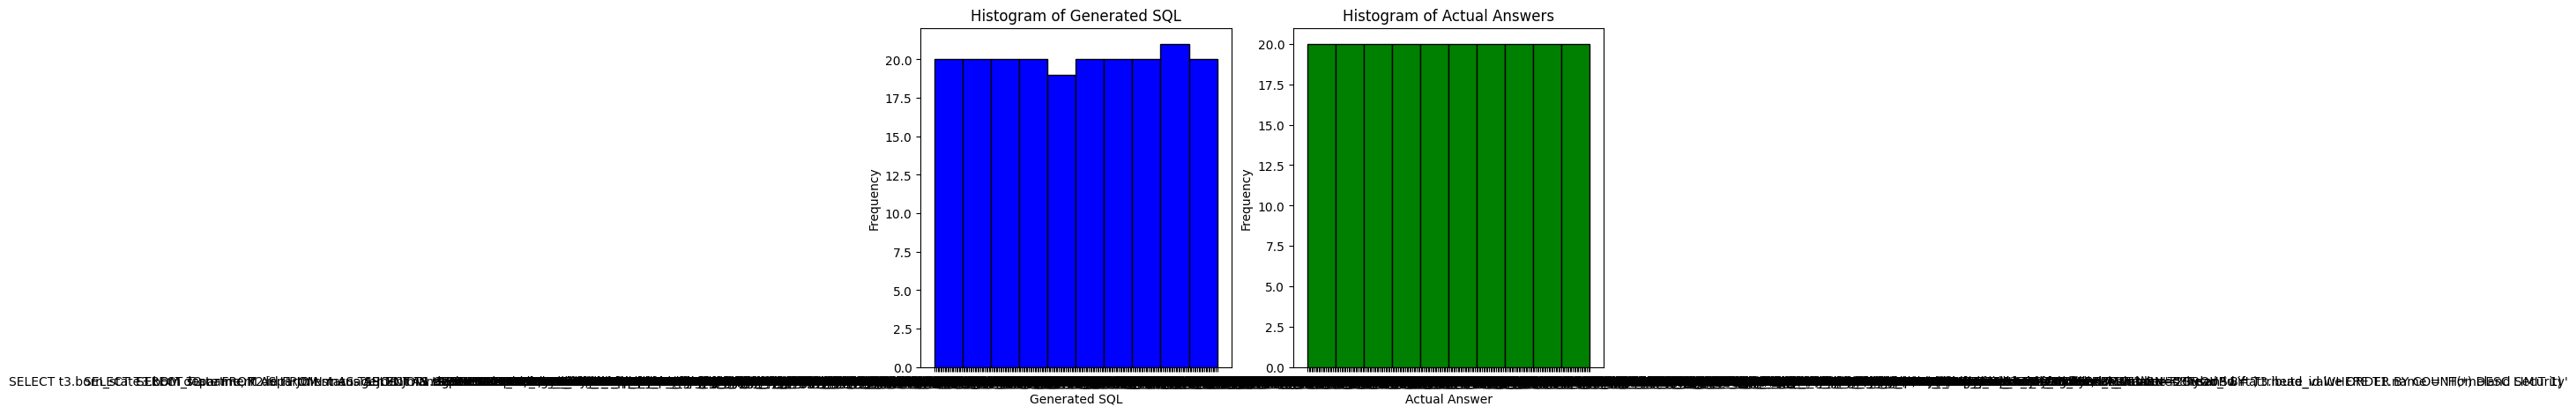

In [ ]:
import matplotlib.pyplot as plt

# Example data for histograms (replace with your data)
generated_sql = df['Generated SQL']
actual_answer = df['Actual Answer']

# Create histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(generated_sql, bins=10, color='blue', edgecolor='black')
plt.xlabel('Generated SQL')
plt.ylabel('Frequency')
plt.title('Histogram of Generated SQL')

plt.subplot(1, 2, 2)
plt.hist(actual_answer, bins=10, color='green', edgecolor='black')
plt.xlabel('Actual Answer')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Answers')

plt.tight_layout()
plt.show()


In [ ]:
!pip install nltk rouge


In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge

# Extract reference texts and candidate texts from your dataset
reference_texts = df['Actual Answer'].tolist()
candidate_texts = df['Generated SQL'].tolist()

# Compute BLEU score
bleu_score = corpus_bleu([[ref.split()] for ref in reference_texts], [cand.split() for cand in candidate_texts])

print(f"BLEU Score: {bleu_score}")

# Initialize Rouge
rouge = Rouge()

# Compute ROUGE score
scores = rouge.get_scores(candidate_texts, reference_texts, avg=True)

print(f"ROUGE Scores: {scores}")


BLEU Score: 0.7455462537664109
ROUGE Scores: {'rouge-1': {'r': 0.935317905182081, 'p': 0.9462556133237247, 'f': 0.9386608859833706}, 'rouge-2': {'r': 0.8440263575439224, 'p': 0.8523035605285304, 'f': 0.8455274681835157}, 'rouge-l': {'r': 0.9248774030028014, 'p': 0.9351188330718128, 'f': 0.9279501596878025}}
